## Loading Data

In [83]:
import pandas as pd
import numpy as np

df = pd.read_csv("data/Clean_Dataset.csv")
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


## Exploring Data

<Axes: ylabel='count'>

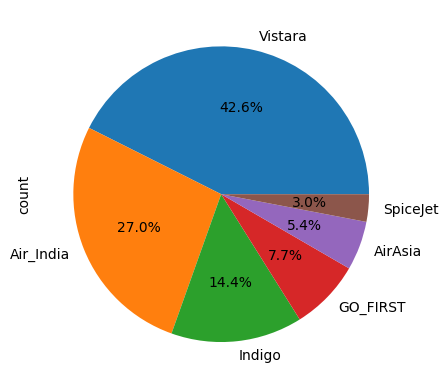

In [84]:
df.airline.value_counts().plot(kind="pie", autopct="%1.1f%%")

In [85]:
df.source_city.value_counts()


source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [86]:
df.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [87]:
df['duration'].min()

0.83

In [88]:
df["duration"].max()

49.83

In [89]:
df["duration"].median()

11.25

## Preprocessing

We're going to want to drop features that are NULL and those that we think is irrelevant

For this project, the "flight" identifier column is deemed irrelevant


In [90]:
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('flight', axis=1)

df['class'] = df['class'].apply(lambda x: 1 if x== 'Business' else 0)

In [91]:
df.stops = pd.factorize(df.stops)[0]

In [92]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,1,Evening,Hyderabad,1,10.08,49,69265
300149,Vistara,Chennai,Afternoon,1,Night,Hyderabad,1,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,1,Night,Hyderabad,1,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,1,Evening,Hyderabad,1,10.00,49,81585


In [93]:
df = df.join(pd.get_dummies(df.airline, prefix="airline").astype(int)).drop(
    "airline", axis=1
)
df = df.join(pd.get_dummies(df.source_city, prefix="source").astype(int)).drop(
    "source_city", axis=1
)
df = df.join(
    pd.get_dummies(df.destination_city, prefix="destination").astype(int)
).drop("destination_city", axis=1)
df = df.join(pd.get_dummies(df.arrival_time, prefix="arrival").astype(int)).drop(
    "arrival_time", axis=1
)
df = df.join(pd.get_dummies(df.departure_time, prefix="departure").astype(int)).drop(
    "departure_time", axis=1
)

In [94]:
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,0,2.17,1,5953,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
1,0,0,2.33,1,5953,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2,0,0,2.17,1,5956,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,5955,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,2.33,1,5955,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
300149,1,1,10.42,49,77105,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
300150,1,1,13.83,49,79099,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
300151,1,1,10.00,49,81585,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


## Training Regression Model

In [95]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.model_selection import train_test_split

X, y = df.drop('price', axis=1), df['price']

In [96]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Linear Regression

In [97]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

Random Forest

In [98]:
random_forest_reg = RandomForestRegressor(n_jobs=-1);

random_forest_reg.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

Gradient Boosting

In [99]:
xgb_reg = xgb.XGBRegressor(
    objective="reg:squarederror", 
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
)

xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

# Evaluating Models

In [100]:
linear_reg.score(X_test, y_test)

0.9090879790514423

In [101]:
random_forest_reg.score(X_test, y_test)

0.9851728567229864

In [102]:
xgb_reg.score(X_test, y_test)

0.9672286510467529

In [103]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = random_forest_reg.predict(X_test)
linear_reg_y_pred = linear_reg.predict(X_test)
xgb_regressor_y_pred = xgb_reg.predict(X_test)

print("Linear Regression Scores: ")
print(f"R2 Score: {r2_score(y_test, linear_reg_y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, linear_reg_y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, linear_reg_y_pred)}")
print(f"Root Mean Squared Error: {math.sqrt(mean_squared_error(y_test, linear_reg_y_pred))}")

print("\n")

print("Random Forest Regressor Scores: ")
print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"Root Mean Squared Error: {math.sqrt(mean_squared_error(y_test, y_pred))}")

print("\n")
print("XGBoost Gradient Boosting Scores: ")
print(f"R2 Score: {r2_score(y_test, xgb_regressor_y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, xgb_regressor_y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, xgb_regressor_y_pred)}")
print(
    f"Root Mean Squared Error: {math.sqrt(mean_squared_error(y_test, xgb_regressor_y_pred))}"
)

Linear Regression Scores: 
R2 Score: 0.9090879790514423
Mean Absolute Error: 4548.025266140403
Mean Squared Error: 47066230.045802504
Root Mean Squared Error: 6860.48322247074


Random Forest Regressor Scores: 
R2 Score: 0.9851728567229864
Mean Absolute Error: 1082.173103393868
Mean Squared Error: 7676187.693516139
Root Mean Squared Error: 2770.5933829265055


XGBoost Gradient Boosting Scores: 
R2 Score: 0.9672286510467529
Mean Absolute Error: 2348.6318359375
Mean Squared Error: 16966130.0
Root Mean Squared Error: 4118.996236948998


Text(0.5, 1.0, 'Actual vs Predicted Prices (Linear Regression)')

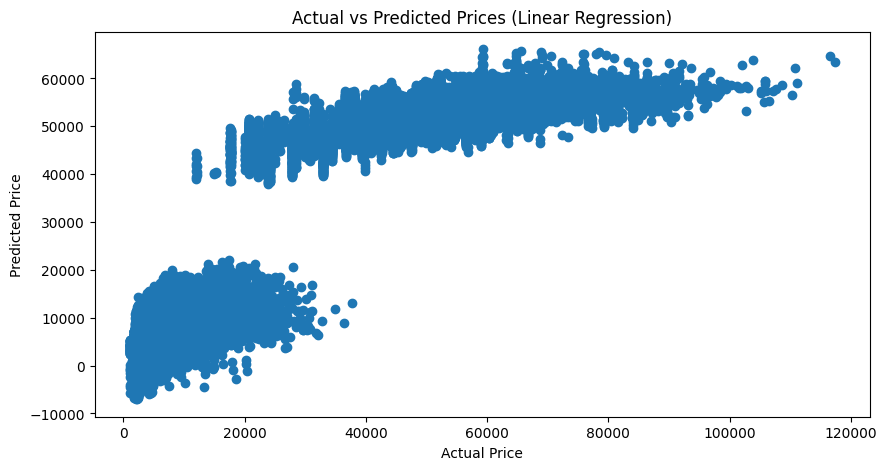

In [104]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(y_test, linear_reg_y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices (Linear Regression)")

Text(0.5, 1.0, 'Actual vs Predicted Prices (Random Forest)')

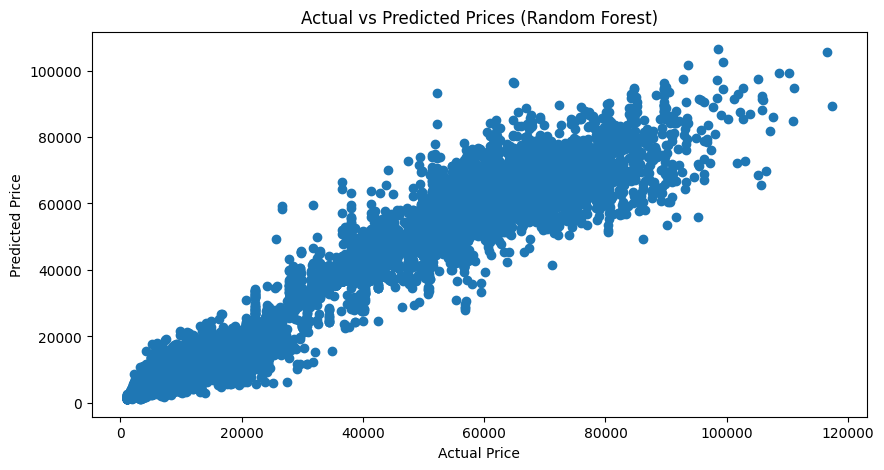

In [105]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices (Random Forest)")

Text(0.5, 1.0, 'Actual vs Predicted Prices (Random Forest)')

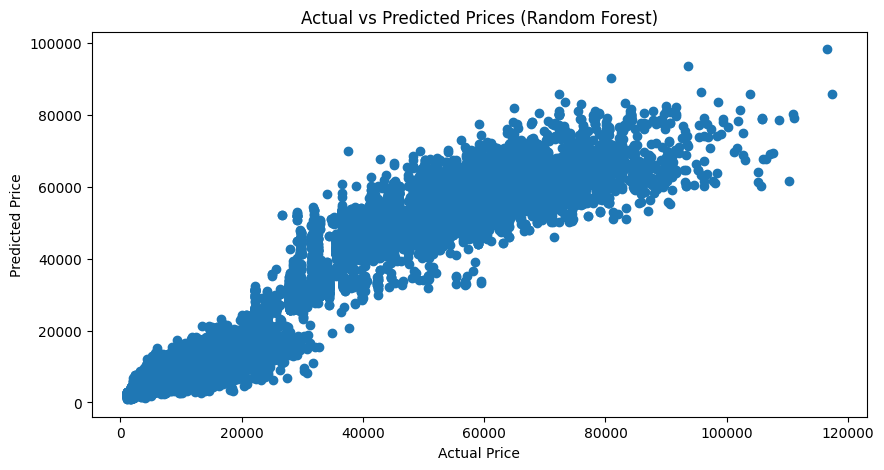

In [106]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, xgb_regressor_y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices (Random Forest)")

In [107]:
df.price.describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

In [108]:
importances = dict(
    zip(random_forest_reg.feature_names_in_, random_forest_reg.feature_importances_)
)
sorted_importances = sorted(importances.items(), key= lambda x: x[1], reverse=True)

sorted_importances

[('class', 0.880017448084259),
 ('duration', 0.057409517660607604),
 ('days_left', 0.018503999008684033),
 ('airline_Vistara', 0.005301403564789643),
 ('airline_Air_India', 0.004592406668039795),
 ('source_Delhi', 0.003926263388407857),
 ('destination_Delhi', 0.0032827823675003155),
 ('source_Mumbai', 0.0022037986494799844),
 ('destination_Mumbai', 0.0018574197330038828),
 ('stops', 0.001856802706225168),
 ('destination_Kolkata', 0.001846684986340412),
 ('source_Kolkata', 0.0017226249439340215),
 ('destination_Hyderabad', 0.0015304633117805197),
 ('arrival_Evening', 0.0015252317271194507),
 ('source_Hyderabad', 0.001370338771237053),
 ('destination_Bangalore', 0.0012526493701725727),
 ('arrival_Night', 0.0011548118106959825),
 ('departure_Evening', 0.0011494061847785587),
 ('source_Bangalore', 0.0010738836269236958),
 ('arrival_Afternoon', 0.0010376955854293302),
 ('source_Chennai', 0.0009099959161944237),
 ('destination_Chennai', 0.0008932192770379076),
 ('departure_Morning', 0.000858

In [109]:
df.days_left.describe()

count    300153.000000
mean         26.004751
std          13.561004
min           1.000000
25%          15.000000
50%          26.000000
75%          38.000000
max          49.000000
Name: days_left, dtype: float64

<BarContainer object of 5 artists>

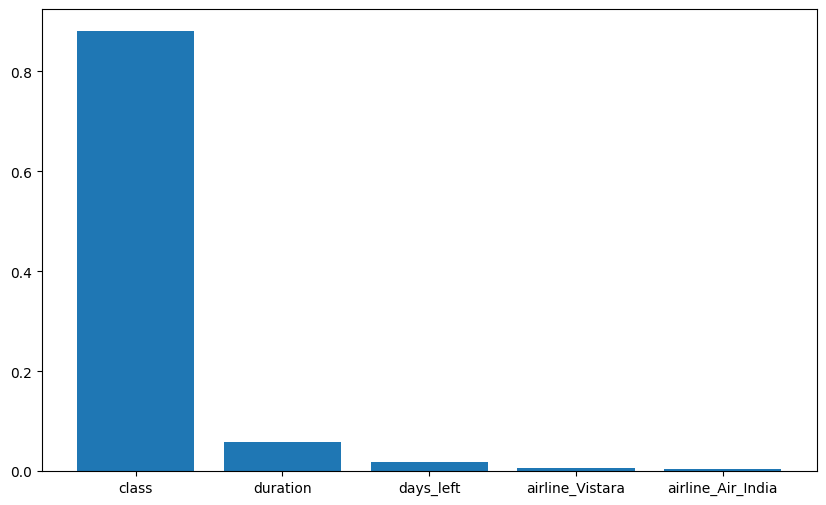

In [110]:
plt.figure(figsize=(10, 6))
plt.bar([x[0] for x in sorted_importances[:5]], [x[1] for x in sorted_importances[:5]])

## Hyper Parameter Tuning

In [111]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Randomized grid search by providing ranges
param_dist = {
    "n_estimators": randint(100, 300),
    "max_depth": [None, 10, 20, 30, 40, 50],
    "min_samples_split": randint(2, 11),
    "min_samples_leaf": randint(1, 5),
    "max_features": [1.0, "sqrt", "log2", None],
}

reg = RandomForestRegressor(n_jobs=-1)

random_search = RandomizedSearchCV(
    estimator=reg,
    param_distributions=param_dist,
    n_iter=2,
    cv=3,
    scoring="neg_mean_squared_error", 
    verbose=2,
    random_state=10,
    n_jobs=-1,
)

random_search.fit(X_train, y_train)
best_regressor = random_search.best_estimator_

Fitting 3 folds for each of 2 candidates, totalling 6 fits


In [112]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from xgboost import XGBRegressor

# Define the model
xgb_reg = XGBRegressor(objective="reg:squarederror", random_state=42)

# Define valid XGBoost hyperparameter distributions
param_dist = {
    "n_estimators": randint(100, 300),
    "max_depth": randint(3, 10),
    "learning_rate": uniform(0.01, 0.3),  
    "subsample": uniform(0.6, 0.4),  
    "colsample_bytree": uniform(0.6, 0.4),
    "gamma": uniform(0, 0.5),
    "min_child_weight": randint(1, 6),
}

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_reg,
    param_distributions=param_dist,
    n_iter=10,
    scoring="neg_mean_squared_error",
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1,
)

random_search.fit(X_train, y_train)

best_xgb = random_search.best_estimator_


Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [113]:
best_regressor.score(X_test, y_test)

0.9862092658475813

In [114]:
best_xgb.score(X_test, y_test)

0.988193690776825

In [129]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = best_regressor.predict(X_test)
xgb_y_pred = best_xgb.predict(X_test)

print("Random Forest: ")
print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"Root Mean Squared Error: {math.sqrt(mean_squared_error(y_test, y_pred))}")

print("\n")

print("Gradient Boosting: ")
print(f"R2 Score: {r2_score(y_test, xgb_y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, xgb_y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, xgb_y_pred)}")
print(f"Root Mean Squared Error: {math.sqrt(mean_squared_error(y_test, xgb_y_pred))}")

Random Forest: 
R2 Score: 0.9862092658475813
Mean Absolute Error: 1093.0070324349747
Mean Squared Error: 7139626.414041794
Root Mean Squared Error: 2672.0079367475305


Gradient Boosting: 
R2 Score: 0.988193690776825
Mean Absolute Error: 1280.5882568359375
Mean Squared Error: 6112270.5
Root Mean Squared Error: 2472.3006491929737


Text(0.5, 1.0, 'Actual vs Predicted Prices (Random Forest)')

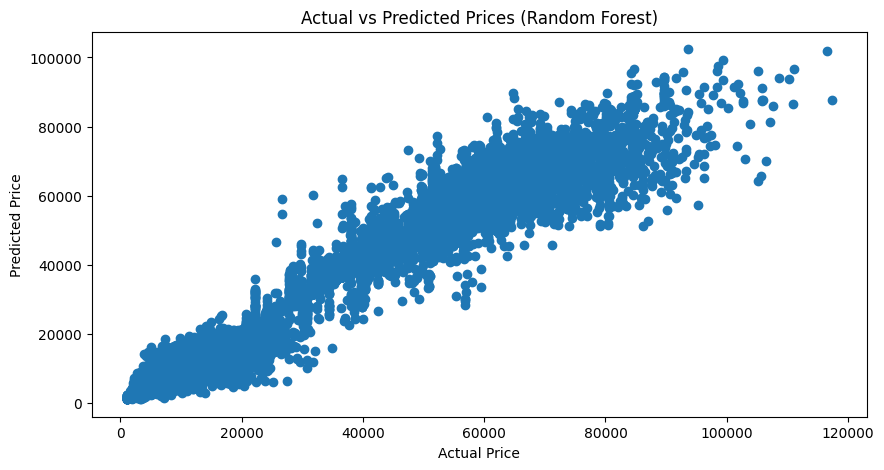

In [120]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices (Random Forest)")

Text(0.5, 1.0, 'Actual vs Predicted Prices (Gradient Boosting)')

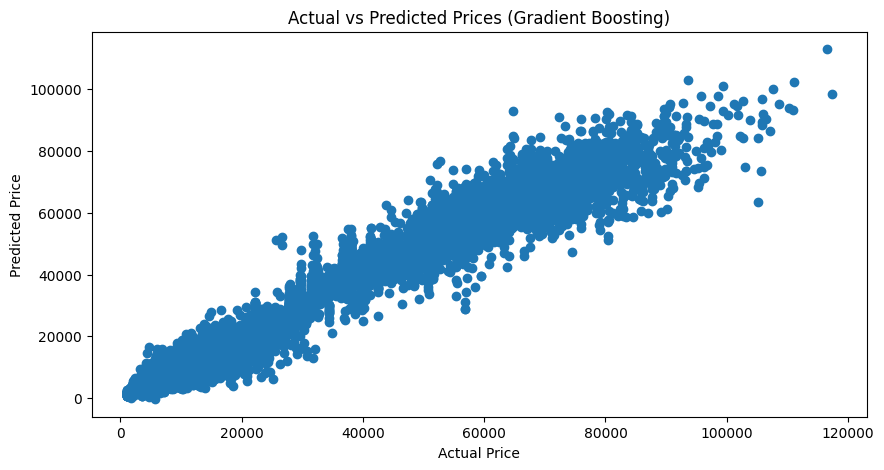

In [121]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, xgb_y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices (Gradient Boosting)")

# Model Comparison

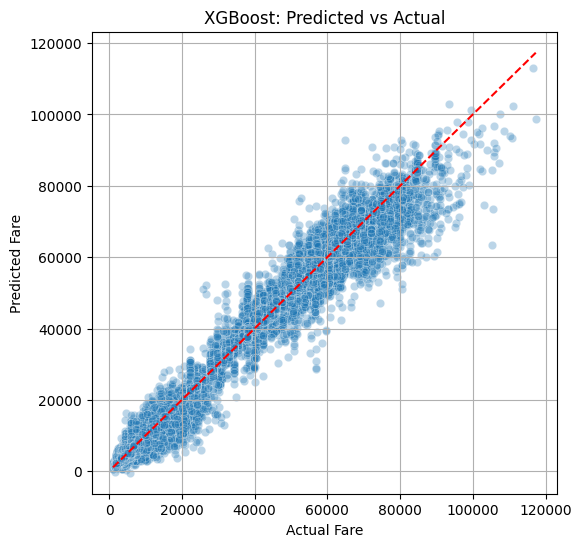

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=xgb_y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("XGBoost: Predicted vs Actual")
plt.grid()
plt.show()

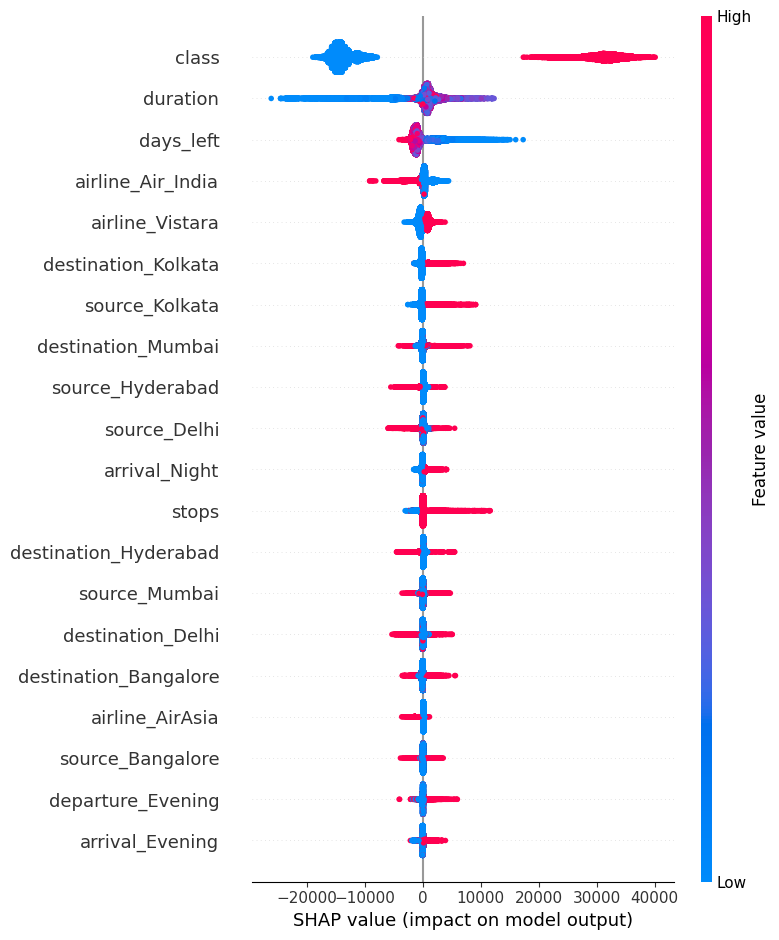

In [128]:
import shap

explainer = shap.Explainer(random_search.best_estimator_)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)

# Exporting Model

In [131]:
import joblib

# Export the model
joblib.dump(best_xgb, "./model/flight_price_model.joblib")

# Also save the feature names for future reference
feature_names = best_xgb.feature_names_in_
joblib.dump(feature_names, "./model/model_features.joblib")

print("Model and features have been exported successfully!")
print(f"Model R2 Score: {best_xgb.score(X_test, y_test):.4f}")

Model and features have been exported successfully!
Model R2 Score: 0.9882


In [119]:
from use_model import predict_flight_price 

# Example

sample_input = {
        "stops": 0,
        "class": 0,  # 0 for Economy, 1 for Business
        "duration": 2.5,
        "days_left": 15,
        "airline_AirAsia": 0,
        "airline_Air_India": 0,
        "airline_GO_FIRST": 0,
        "airline_Indigo": 1,
        "airline_SpiceJet": 0,
        "airline_Vistara": 0,
        "source_Bangalore": 0,
        "source_Chennai": 0,
        "source_Delhi": 1,
        "source_Hyderabad": 0,
        "source_Kolkata": 0,
        "source_Mumbai": 0,
        "destination_Bangalore": 0,
        "destination_Chennai": 0,
        "destination_Delhi": 0,
        "destination_Hyderabad": 0,
        "destination_Kolkata": 0,
        "destination_Mumbai": 1,
        "departure_Afternoon": 0,
        "departure_Early_Morning": 0,
        "departure_Evening": 1,
        "departure_Late_Night": 0,
        "departure_Morning": 0,
        "departure_Night": 0,
        "arrival_Afternoon": 0,
        "arrival_Early_Morning": 0,
        "arrival_Evening": 0,
        "arrival_Late_Night": 0,
        "arrival_Morning": 1,
        "arrival_Night": 0,
    }

delhi_mumbai_price = predict_flight_price(sample_input)
print(f"Delhi to Mumbai flight price: Rs. {delhi_mumbai_price:,.2f}")

Delhi to Mumbai flight price: Rs. 4,103.85


## Conclusion

| Model                           | R² Score (Accuracy) | Comments                                                                          |
| ------------------------------- | ------------------- | --------------------------------------------------------------------------------- |
| **Linear Regression**           | 90.9%               | Baseline model. Struggles with capturing non-linear relationships in features.    |
| **Random Forest (default)**     | 98.54%              | Strong performance due to ability to model non-linearity and interactions.        |
| **Random Forest (tuned)**       | 98.62%              | Slight improvement after hyperparameter tuning.                                   |
| **Gradient Boosting (default)** | 96.72%              | Good performance, but less optimal without tuning.                                |
| **Gradient Boosting (tuned)**   | ⭐ **98.81%**        | Best performer. Captures complex patterns and benefits significantly from tuning. |


**The most important features to consider when purchasing a flight:**

1. ('class', 0.8806480796823627)
2. ('duration', 0.05706863815196575)
3. ('days_left', 0.01854988218795672)

**XGBoost slightly outperforms Random Forest** in terms of R², MSE, and RMSE meaning it explains more variance and has less overall error

**Random Forest edges out in MAE**, suggesting that it's slightly better at minimizing average error per prediction

**XGBoost** seems to generalize slightly better after tuning

| Metric       | Random Forest | XGBoost (Tuned) | Best      |
| ------------ | ------------- | --------------- | --------- |
| **R² Score** | 0.9862        | ⭐ **0.9882**    | ⭐ XGBoost |
| **MAE**      | ⭐ **1093.01** | 1280.59         | RF        |
| **MSE**      | 7,139,626     | ⭐ **6,112,270** | ⭐ XGBoost |
| **RMSE**     | 2,672.01      | ⭐ **2,472.30**  | ⭐ XGBoost |
